# Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df=pd.read_csv("flight_fare.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Go First,21:55,00:50,7488,Bengaluru,Delhi,2h 55m,Non,2022-02-26
1,1,IndiGo,20:10,23:10,7488,Bengaluru,Delhi,3h,Non,2022-02-26
2,2,Vistara,21:10,23:45,7489,Bengaluru,Delhi,2h 35m,Non,2022-02-26
3,3,Vistara,19:40,22:25,7489,Bengaluru,Delhi,2h 45m,Non,2022-02-26
4,4,Air Asia,19:25,22:15,7489,Bengaluru,Delhi,2h 50m,Non,2022-02-26
...,...,...,...,...,...,...,...,...,...,...
8272,8272,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,2022-03-07
8273,8273,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,2022-03-07
8274,8274,Vistara,15:20,22:55,18879,Kolkata,Hyderabad,7h 35m,1,2022-03-07
8275,8275,Vistara,10:25,19:55,20075,Kolkata,Hyderabad,9h 30m,2,2022-03-07


In [3]:
# importing dataset
df=pd.read_csv("flight_fare.csv")
df

,Unnamed: 0,Flight name,Departure_time,Arrival_time,Price,Source,Destination,Duration,No of stop,Date
0,0,Go First,21:55,00:50,7488,Bengaluru,Delhi,2h 55m,Non,2022-02-26
1,1,IndiGo,20:10,23:10,7488,Bengaluru,Delhi,3h,Non,2022-02-26
2,2,Vistara,21:10,23:45,7489,Bengaluru,Delhi,2h 35m,Non,2022-02-26
3,3,Vistara,19:40,22:25,7489,Bengaluru,Delhi,2h 45m,Non,2022-02-26
4,4,Air Asia,19:25,22:15,7489,Bengaluru,Delhi,2h 50m,Non,2022-02-26
...,...,...,...,...,...,...,...,...,...,...
8272,8272,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,2022-03-07
8273,8273,Vistara,10:15,20:55,18505,Kolkata,Hyderabad,10h 40m,2,2022-03-07
8274,8274,Vistara,15:20,22:55,18879,Kolkata,Hyderabad,7h 35m,1,2022-03-07
8275,8275,Vistara,10:25,19:55,20075,Kolkata,Hyderabad,9h 30m,2,2022-03-07


In [4]:
# checking shape of dataset
print("The no. of Rows in dataset is: ",df.shape[0],"and no. of columns is ",df.shape[1])

The no. of Rows in dataset is:  8277 and no. of columns is  10


In [5]:
# checking datatype of object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8277 non-null   int64 
 1   Flight name     8277 non-null   object
 2   Departure_time  8277 non-null   object
 3   Arrival_time    8277 non-null   object
 4   Price           8277 non-null   int64 
 5   Source          8277 non-null   object
 6   Destination     8277 non-null   object
 7   Duration        8277 non-null   object
 8   No of stop      8277 non-null   object
 9   Date            8277 non-null   object
dtypes: int64(2), object(8)
memory usage: 646.8+ KB


In [6]:
# checking null value
df.isnull().sum()

Unnamed: 0        0
Flight name       0
Departure_time    0
Arrival_time      0
Price             0
Source            0
Destination       0
Duration          0
No of stop        0
Date              0
dtype: int64

In [8]:
#checking basic info 
df.describe()

,Unnamed: 0,Price
count,8277.000000,8277.000000
mean,4138.000000,7995.679957
std,2389.508422,3999.594007
min,0.000000,1694.000000
25%,2069.000000,5177.000000
50%,4138.000000,7161.000000
75%,6207.000000,9744.000000
max,8276.000000,33894.000000


In [9]:
#checking unique in dataset
df.nunique().sort_values()

Source               2
Destination          4
No of stop           5
Flight name          6
Date                 9
Departure_time     197
Arrival_time       242
Duration           360
Price             1761
Unnamed: 0        8277
dtype: int64

<AxesSubplot:>

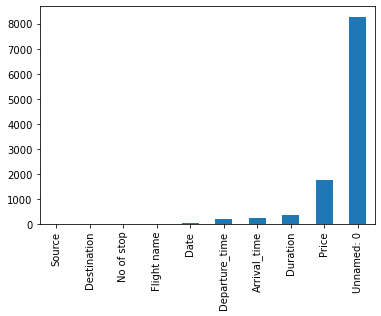

In [10]:
#checking unique in dataset
df.nunique().sort_values().plot.bar()

### EDA(Exploratory Data Analysis):

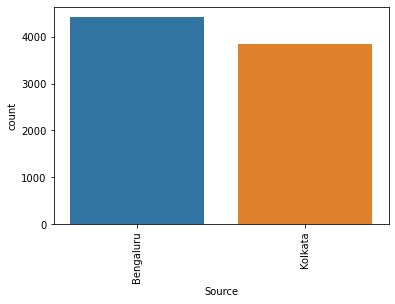

In [11]:
sns.countplot(df["Source"],data=df)
plt.xticks(rotation=90)
plt.show()


for both the location the flight ratio is almost same but their is high in bengaluru and low in kolkata.

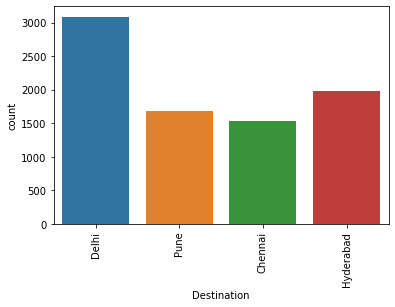

In [13]:
sns.countplot(df["Destination"],data=df)
plt.xticks(rotation=90)
plt.show()

we can see that for delhi destination have more flight than compare to others destination.

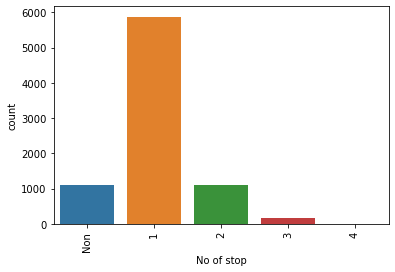

In [14]:
sns.countplot(df["No of stop"],data=df)
plt.xticks(rotation=90)
plt.show()

most of the flights are one stop flight and generally people prefer hault in journey.

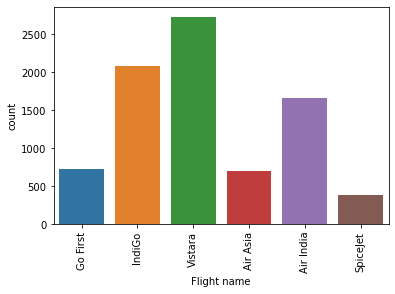

In [15]:
sns.countplot(df["Flight name"],data=df)
plt.xticks(rotation=90)
plt.show()

as we can see vistara has currently most no of flights running,next by indigo and soon,,.

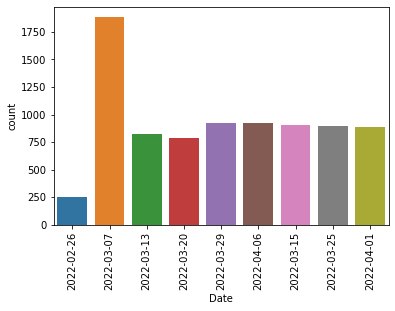

In [16]:
sns.countplot(df["Date"],data=df)
plt.xticks(rotation=90)
plt.show()

Their is high flights on date is 7 march 2022 and their is almost same for all dates other than the 26 february 2022.

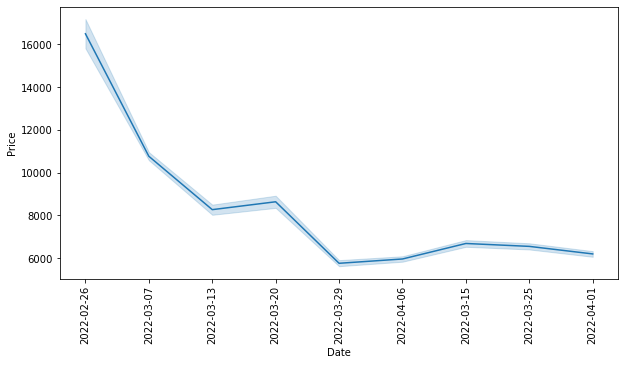

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(df["Date"],df["Price"])
plt.xticks(rotation=90)
plt.show()

we can see that last minute flight are expensive or the flight whiuch is near some festive occasion are expensive.

<AxesSubplot:xlabel='Price', ylabel='Density'>

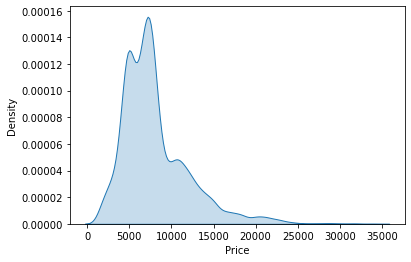

In [18]:
sns.kdeplot(df["Price"],data=df,fill=True)

Price is slightly right skewed.

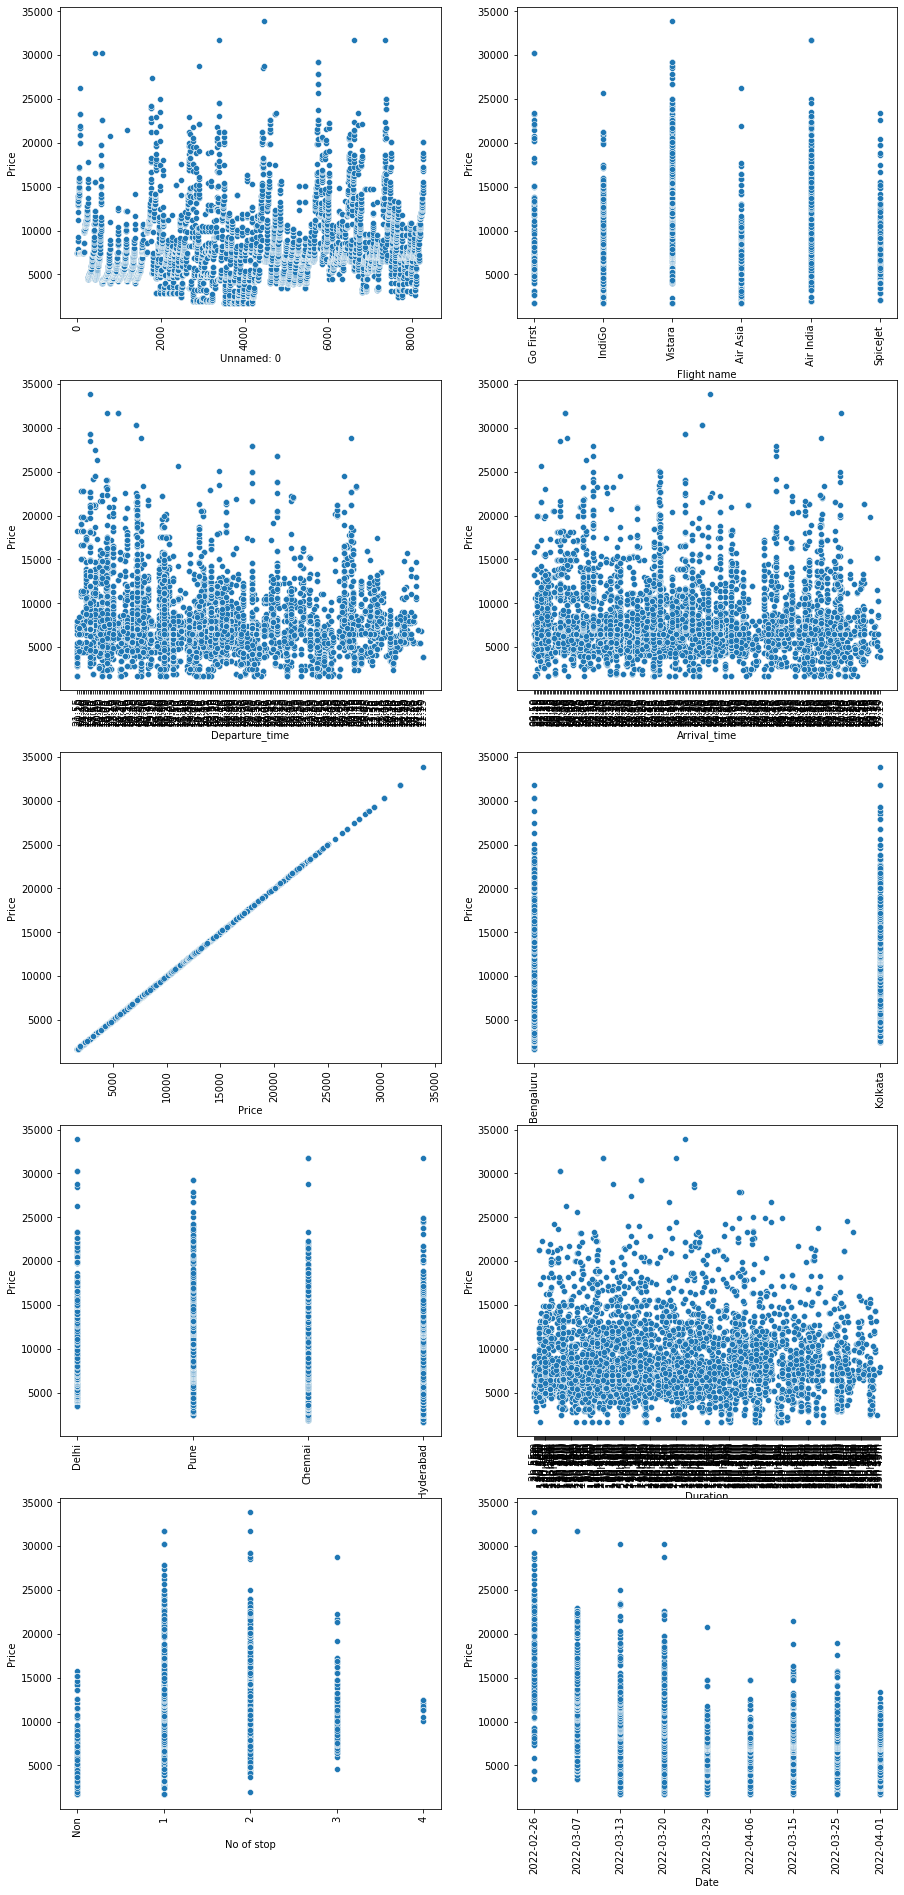

In [19]:
# Bivariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(df[i],df["Price"])
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

* Vistara have maximun travel price as compare to other flights.

* 2 stop flight have high fare as compare to other stops.

* flight to pune have maximum fare may be it is travelling by diferent route and haulting a bit in between

* early morning flight are expensive as compare to afternoon flight.

In [20]:
# splitting date into date and month 
df["Date"]= pd.to_datetime(df["Date"])
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month

In [21]:
# splitting daparture time and arrival time
df["Departure_time"] = pd.to_datetime(df["Departure_time"])

df["dep_hour"] = df["Departure_time"].dt.hour

df["dep_min"] = df["Departure_time"].dt.minute

In [22]:
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"])
df['Arr_hour'] = df["Arrival_time"].dt.hour
df['Arr_min'] = df["Arrival_time"].dt.minute

In [23]:
# Dropping unwanted columns 
df.drop(["Date","Departure_time","Arrival_time","Unnamed: 0"],axis=1,inplace=True)

In [24]:
# splitting duration into and hour and min in seperate column for better understanding
s=pd.to_timedelta(df['Duration'])
df['hours']=s.dt.components['hours']
df['minutes']=s.dt.components['minutes']

In [25]:
df.drop(["Duration"],inplace=True,axis=1)

In [26]:
# replacing non with 0 to make it a discrete column as model will not understan non
df["No of stop"] = df["No of stop"].replace("Non",0)

In [27]:
# changing datatype of int
df["No of stop"]= df["No of stop"].astype("int64")

In [28]:
# replacing source manually with 1 and 2
df["Source"] = df["Source"].replace("Bengaluru",1)
df["Source"] = df["Source"].replace("Kolkata",2)

In [29]:
# verifying datatype is correct 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  8277 non-null   object
 1   Price        8277 non-null   int64 
 2   Source       8277 non-null   int64 
 3   Destination  8277 non-null   object
 4   No of stop   8277 non-null   int64 
 5   Day          8277 non-null   int64 
 6   Month        8277 non-null   int64 
 7   dep_hour     8277 non-null   int64 
 8   dep_min      8277 non-null   int64 
 9   Arr_hour     8277 non-null   int64 
 10  Arr_min      8277 non-null   int64 
 11  hours        8277 non-null   int64 
 12  minutes      8277 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 840.8+ KB


### Label encoding:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight name  8277 non-null   object
 1   Price        8277 non-null   int64 
 2   Source       8277 non-null   int64 
 3   Destination  8277 non-null   object
 4   No of stop   8277 non-null   int64 
 5   Day          8277 non-null   int64 
 6   Month        8277 non-null   int64 
 7   dep_hour     8277 non-null   int64 
 8   dep_min      8277 non-null   int64 
 9   Arr_hour     8277 non-null   int64 
 10  Arr_min      8277 non-null   int64 
 11  hours        8277 non-null   int64 
 12  minutes      8277 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 840.8+ KB


In [31]:
en=["Flight name","Destination"]

In [32]:
# for converting categorical to numericalcolumn as machine learing understands numerical value not text
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in df[en]:
    df[i]=label.fit_transform(df[i])
    
df

,Flight name,Price,Source,Destination,No of stop,Day,Month,dep_hour,dep_min,Arr_hour,Arr_min,hours,minutes
0,2,7488,1,1,0,26,2,21,55,0,50,2,55
1,3,7488,1,1,0,26,2,20,10,23,10,3,0
2,5,7489,1,1,0,26,2,21,10,23,45,2,35
3,5,7489,1,1,0,26,2,19,40,22,25,2,45
4,0,7489,1,1,0,26,2,19,25,22,15,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,5,18505,2,2,2,7,3,10,15,20,55,10,40
8273,5,18505,2,2,2,7,3,10,15,20,55,10,40
8274,5,18879,2,2,1,7,3,15,20,22,55,7,35
8275,5,20075,2,2,2,7,3,10,25,19,55,9,30


In [33]:
from sklearn.preprocessing import PowerTransformer

In [34]:
pt = PowerTransformer()
df[["Arr_hour","Day"]]= pt.fit_transform(df[["Arr_hour","Day"]])

<function matplotlib.pyplot.show(close=None, block=None)>

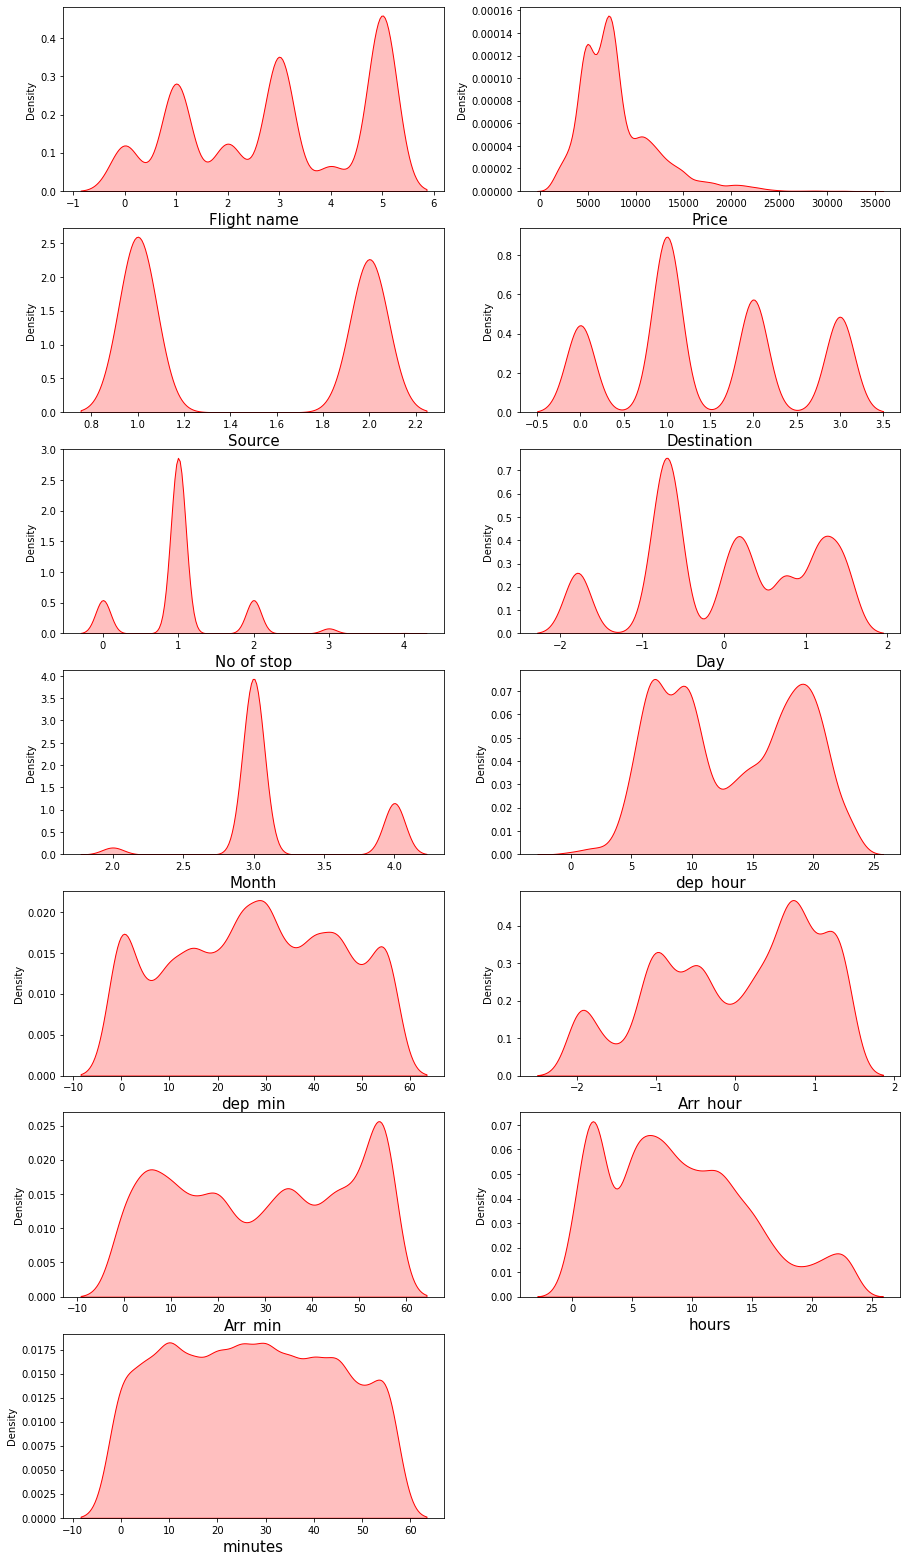

In [35]:
# univariate analysis
plotnumber=1
plt.figure(figsize=(15,40))
for i in df:
    if plotnumber < 20:
        ax=plt.subplot(10,2,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color="r")
        plt.xlabel(i,fontsize=15)
        plotnumber+=1
plt.show

All columns are normally distributed except price which is target column.

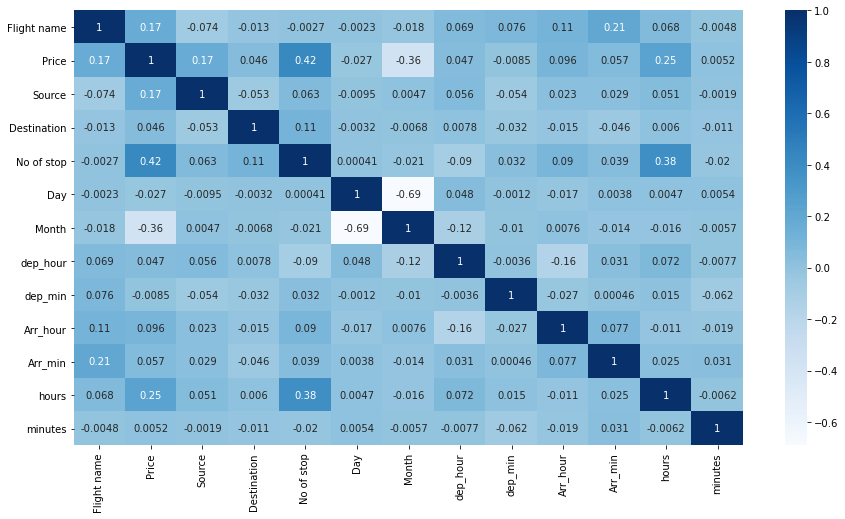

In [39]:
# multivariate analysis
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True,cmap = "Blues")
plt.show()

month and day is showing good correlation.

### Dividing data into X and Y

In [40]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [41]:
x.shape

(8277, 12)

In [42]:
y.shape

(8277,)

### scaling X values

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [45]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [46]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000,8277.000000
mean,0.591712,0.465869,0.486811,0.261145,0.552037,0.594781,0.574767,0.504992,0.594680,0.537612,0.384307,0.492339
std,0.347433,0.498864,0.337263,0.150030,0.308183,0.230811,0.241880,0.312266,0.296285,0.342247,0.259613,0.306668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.333333,0.250000,0.349812,0.500000,0.347826,0.272727,0.340161,0.181818,0.173913,0.181818
50%,0.600000,0.000000,0.333333,0.250000,0.574540,0.500000,0.565217,0.545455,0.657460,0.545455,0.347826,0.454545
75%,1.000000,1.000000,0.666667,0.250000,0.780914,0.500000,0.782609,0.727273,0.850612,0.909091,0.565217,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled after description.

### Spliting Train and Test data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [49]:
x_train.shape

(6042, 12)

In [50]:
x_test.shape

(2235, 12)

In [51]:
y_train.shape

(6042,)

In [52]:
y_test.shape

(2235,)

### Model building:

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#### LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5008495384166481


In [55]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 8351570.491692461
MAE: 2076.99427338833
r2_score: -0.03586573173065255


#### RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9775218438972029


In [57]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 3274888.247600907
MAE: 934.8969252793194
r2_score: 0.7516358510544029


#### DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9993451530366741


In [59]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 4986415.538659208
MAE: 970.8929306487696
r2_score: 0.6907381694765916


#### GradientBoostingRegressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.7212786031513447


In [61]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 5336026.923547953
MAE: 1557.2904131847945
r2_score: 0.45707116078525123


### cross validation:

In [62]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 8153301.334538, 1764544.774976
RF    : 4292800.996974, 1400729.747985
DTR    : 7747763.548768, 2447701.470933
GBR    : 5537009.598840, 1442365.927248


#### -According to all metrics score selecting the RandomForestRegressor for GridSeachCV

### HYPER PARAMETER TUNING:

### GridSearchCV

### RandomForestRegressor

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [65]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [66]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [67]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [68]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 3274888.247600907
MAE: 934.8969252793194
r2_score: 0.7516358510544029


<AxesSubplot:xlabel='Price', ylabel='Density'>

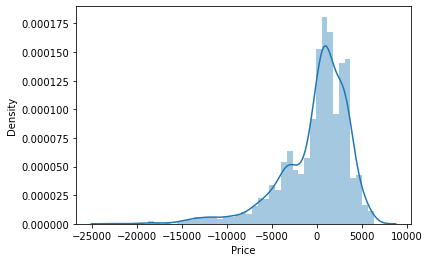

In [69]:
sns.distplot(RF_grid_pred-y_test)

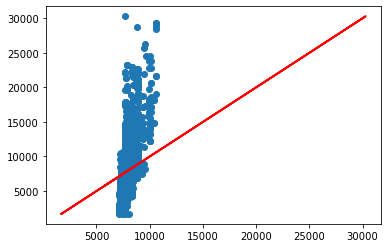

In [70]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

#### Saving the model which i did my best

In [71]:
import joblib

In [72]:
joblib.dump(RF_grid.best_estimator_,'Flight_Price_Pediction_Model building.obj')

['Flight_Price_Pediction_Model building.obj']